In [1]:
import numpy as np
from PIL import ImageFont
from generate_ascii_palette import *
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
FONT = ImageFont.truetype("fonts/CascadiaMono.ttf", 16)
WINDOW_SIZE = (1,1)

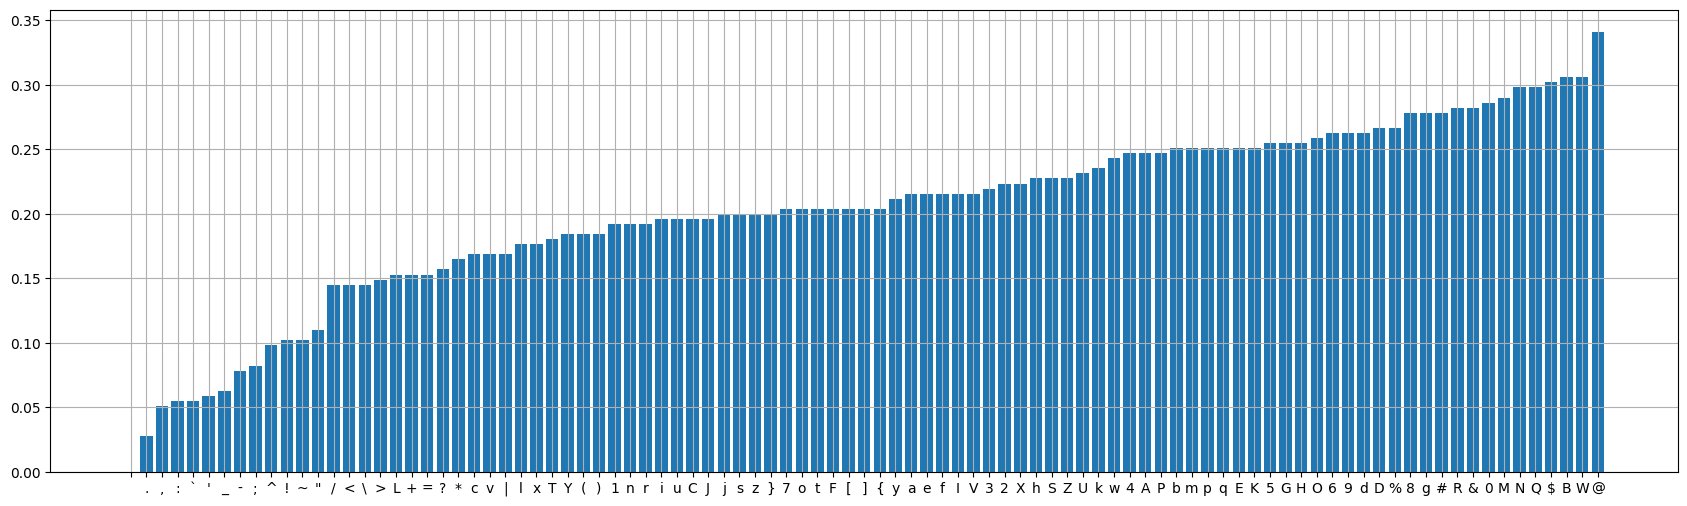

In [3]:
asciis = get_asciis()
brightness_map = generate_brightness_map(asciis, FONT, WINDOW_SIZE)
brightness = [b[0][0] for b in brightness_map.values()]
brightness = list(zip(asciis, brightness))
brightness = sorted(brightness, key=lambda a: a[1])
plt.figure(figsize=(21, 6))
plt.bar([a[0] for a in brightness], [a[1] for a in brightness])
plt.grid()

In [4]:
bins = 12
char_bins = [[] for _ in range(bins)]
bin_br = [[] for _ in range(bins)]
br_max = brightness[-1][1]
br_step = br_max / (bins-1)
for char, char_br in brightness:
    bin_index = int(round(char_br / br_step))
    char_bins[bin_index].append(char)
    bin_br[bin_index].append(char_br)

char_bins = list(filter(lambda b: len(b) > 0, char_bins))
bin_br = list(filter(lambda b: len(b) > 0, bin_br))
bin_br = list(map(mean, bin_br))

print([''.join(l) for l in char_bins])
print(bin_br)

[' ', '.', ",:`'_", '-;^!~', '"', '/<\\>L+=?*cv|', 'lxTY()1nriuCJjsz}', '7otF[]{yaefIV32XhSZU', 'kw4APbmpqEK5GHO69d', 'D%8g#R&0M', 'NQ$BW', '@']
[0.0, 0.027450980392156862, 0.05647058823529412, 0.09254901960784313, 0.10980392156862745, 0.15588235294117647, 0.19100346020761247, 0.21490196078431373, 0.25206971677559914, 0.2788671023965142, 0.30196078431372547, 0.3411764705882353]


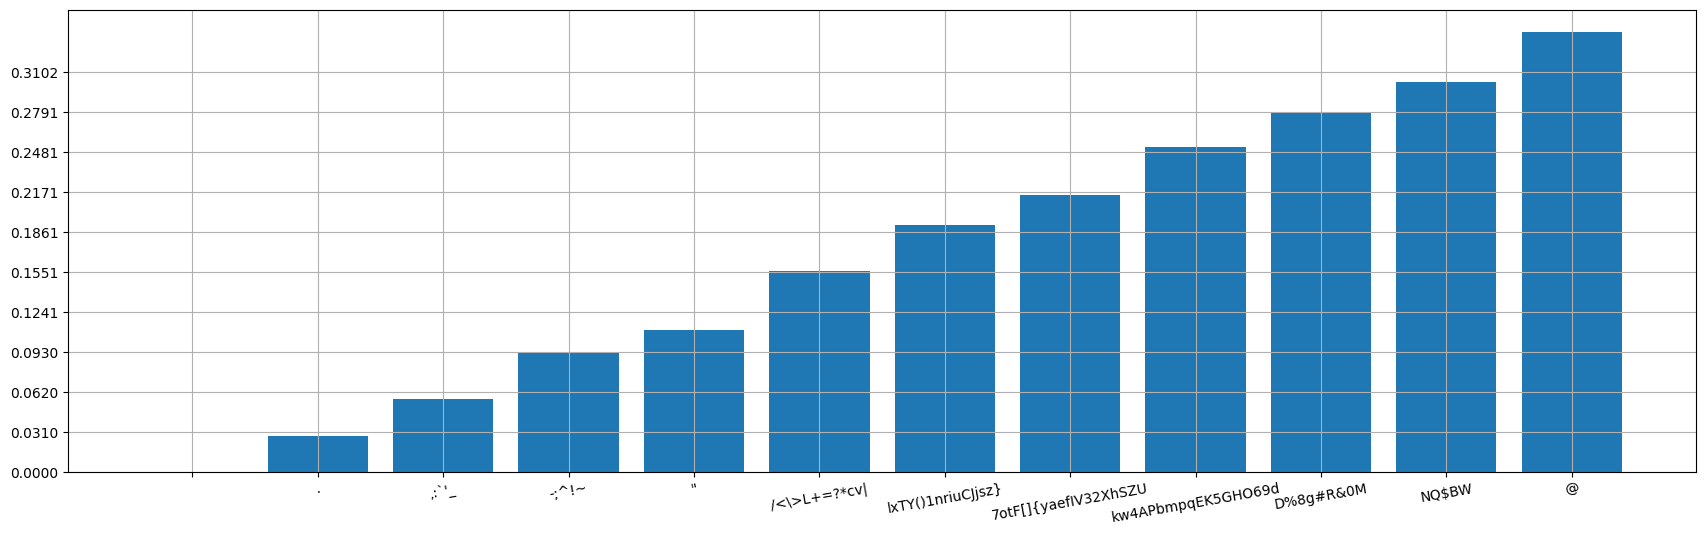

In [5]:
plt.figure(figsize=(21, 6))
plt.yticks(np.arange(0, br_max, br_step))
plt.xticks(rotation=10)
plt.bar([''.join(l) for l in char_bins], bin_br)
plt.grid()

In [6]:
char_bins, bins_br = generate_1_1_palette(get_asciis(), FONT, 12)

print(char_bins)
print(bins_br)

[[' '], ['.'], [',', ':', '`', "'", '_'], ['-', ';', '^', '!', '~'], ['"'], ['/', '<', '\\', '>', 'L', '+', '=', '?', '*', 'c', 'v', '|'], ['l', 'x', 'T', 'Y', '(', ')', '1', 'n', 'r', 'i', 'u', 'C', 'J', 'j', 's', 'z', '}'], ['7', 'o', 't', 'F', '[', ']', '{', 'y', 'a', 'e', 'f', 'I', 'V', '3', '2', 'X', 'h', 'S', 'Z', 'U'], ['k', 'w', '4', 'A', 'P', 'b', 'm', 'p', 'q', 'E', 'K', '5', 'G', 'H', 'O', '6', '9', 'd'], ['D', '%', '8', 'g', '#', 'R', '&', '0', 'M'], ['N', 'Q', '$', 'B', 'W'], ['@']]
[0.0, 0.027450980392156862, 0.05647058823529412, 0.09254901960784312, 0.10980392156862745, 0.1558823529411765, 0.19100346020761247, 0.21490196078431376, 0.25206971677559914, 0.27886710239651413, 0.30196078431372547, 0.3411764705882353]
